In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../Resources/Raw Data/HUD_grantee_awards_2005-2022.csv", skiprows=3)
df.head()



,Year,State,CoC Name,Org Name,Program Name,Program Type,Award Amount
0,2022,AK,AK-501 - Alaska Balance of State CoC,Alaska Housing Finance Corporation,CoC,AK-501 - Special NOFO - Prince of Wales Island...,148995
1,2022,AZ,AZ-500 - Arizona Balance of State CoC,Arizona Department of Housing,CoC,AZ-500 - Special NOFO - RE:center Rural Set As...,355000
2,2022,AZ,AZ-500 - Arizona Balance of State CoC,Arizona Department of Housing,CoC,AZ-500 - Special NOFO - Gila County Rural Set ...,355000
3,2022,AZ,AZ-501 - Tucson/Pima County CoC,City of Tucson,CoC,AZ-501 - Special NOFO - FY22 Tucson Multi-Disc...,1115271
4,2022,AZ,AZ-501 - Tucson/Pima County CoC,City of Tucson,CoC,AZ-501 - Special NOFO - CBI Pima PSH 76,3079482


In [3]:
new_vie_df = df[~df['State'].isin(['MP', 'AS', 'PR', 'VI', 'GU', 'AK', 'DC', 'HI'])]

In [4]:
new_df = df[['Year', 'State', 'Award Amount']]

new_df = new_df.reset_index(drop=True)
new_df.tail()

,Year,State,Award Amount
118586,2005,WV,28071
118587,2005,WV,210627
118588,2005,WV,65256
118589,2005,WV,301920
118590,2005,WY,61016


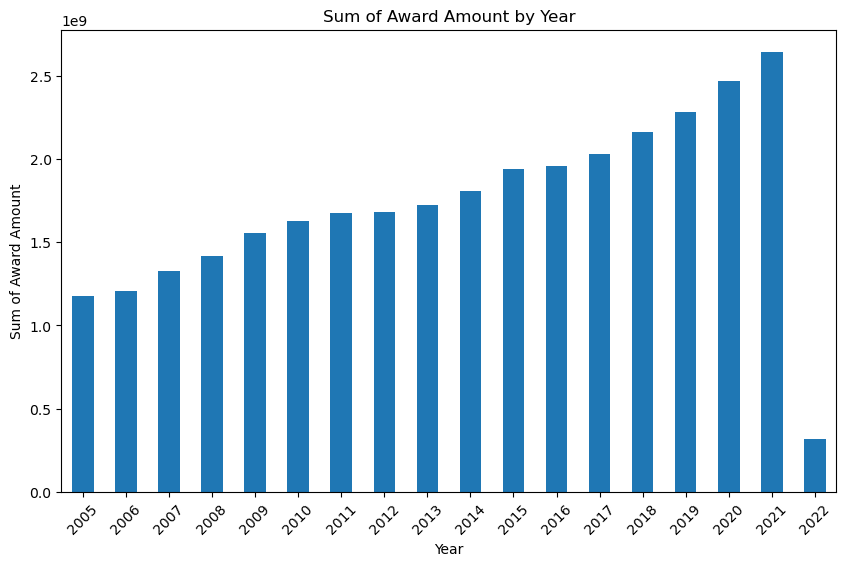

In [5]:
import matplotlib.pyplot as plt

award_sum_by_year = new_df.groupby('Year')['Award Amount'].sum()

award_sum_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('Sum of Award Amount by Year')
plt.xlabel('Year')
plt.ylabel('Sum of Award Amount')
plt.xticks(rotation=45)
plt.show()

In [6]:
funding_2022 = pd.read_excel("../Resources/Raw Data/All-States-2022-Funding-Report.xlsx", engine='openpyxl')

In [7]:
funding_2022.head()

,State,CoC Number,CoC Name,Organization Name,Project or Award Name,FY 2022 Amount
0,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...","AIDS Alabama, Inc.",Ascension Renewal FY2022,833303
1,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...","AIDS Alabama, Inc.",Le Transclusive Expansion FY2022,656299
2,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...","AIDS Alabama, Inc.",Le Transclusive Renewal FY2022,452120
3,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...","AIDS Alabama, Inc.",Way Station TH/RRH Renewal FY2022,284588
4,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...","First Light, Inc.",Fourth Floor Renewal 2022,117915


In [9]:
import us
for index, row in funding_2022.iterrows():
    state_abbr = us.states.lookup(row['State'])
    
    if state_abbr:
        funding_2022.at[index, 'State'] = state_abbr.abbr

In [10]:
cleaned_2022 = funding_2022[['State', 'FY 2022 Amount']]
cleaned_2022.head()
cleaned_2022['Year'] = 2022
cleaned_2022

C:\Users\scott_p9qjqkt\AppData\Local\Temp\ipykernel_12056\890964856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_2022['Year'] = 2022


,State,FY 2022 Amount,Year
0,AL,833303,2022
1,AL,656299,2022
2,AL,452120,2022
3,AL,284588,2022
4,AL,117915,2022
...,...,...,...
6977,WY,110440,2022
6978,WY,66885,2022
6979,WY,40120,2022
6980,WY,15000,2022


In [11]:
cleaned_2022 = cleaned_2022.rename(columns={'FY 2022 Amount': 'Award Amount'})
cleaned_2022 = cleaned_2022[['Year', 'State', 'Award Amount']]

In [12]:
funding_2023 = pd.read_excel("../Resources/Raw Data/FY-2023-CoC-Awards-by-State-PressRelease.xlsx", engine='openpyxl', skiprows=1)
funding_2023.head()

,State,Number of Projects,Award Amount
0,Alabama,53,19580755
1,Alaska,41,6409777
2,Arizona,76,65703841
3,Arkansas,23,4172821
4,California,779,601364006


In [13]:
for index, row in funding_2023.iterrows():
    state_abbr = us.states.lookup(row['State'])
    
    if state_abbr:
        funding_2023.at[index, 'State'] = state_abbr.abbr

In [14]:
new_funding_2023 = funding_2023[~funding_2023['State'].isin(['MP', 'AS', 'PR', 'VI', 'GU', 'AK', 'DC', 'HI', 'District of Columbia', 'Totals:'])]

In [15]:
new_funding_2023 = new_funding_2023.reset_index(drop=True)

In [16]:
total_award_by_state_2022 = cleaned_2022.groupby('State')['Award Amount'].sum().reset_index()

In [17]:
total_award_by_state_2022 = total_award_by_state_2022[~total_award_by_state_2022['State'].isin(['MP', 'AS', 'PR', 'VI', 'GU', 'AK', 'DC', 'HI', 'District of Columbia'])]

In [18]:
total_award_by_state_2022['Year'] = 2022

In [22]:
total_award_by_state_2022 = total_award_by_state_2022[['Year', 'State', 'Award Amount']]
total_award_by_state_2022 = total_award_by_state_2022.reset_index(drop=True)

In [20]:
new_funding_2023['Year'] = 2023
new_funding_2023 = new_funding_2023[['Year', 'State', 'Award Amount']]

In [21]:
new_funding_2023.head()

,Year,State,Award Amount
0,2023,AL,19580755
1,2023,AZ,65703841
2,2023,AR,4172821
3,2023,CA,601364006
4,2023,CO,39835760


In [23]:
total_award_by_state_2022.head()

,Year,State,Award Amount
0,2022,AL,16316728
1,2022,AR,3911243
2,2022,AZ,53597059
3,2022,CA,525839973
4,2022,CO,37141703


In [24]:
new_df.head()

,Year,State,Award Amount
0,2022,AK,148995
1,2022,AZ,355000
2,2022,AZ,355000
3,2022,AZ,1115271
4,2022,AZ,3079482


In [28]:
award_sum_by_year_state = new_df.groupby(['Year', 'State'])['Award Amount'].sum().reset_index()

award_sum_by_year_state.head()

,Year,State,Award Amount
0,2005,AK,2634199
1,2005,AL,12095259
2,2005,AR,2853649
3,2005,AZ,28592468
4,2005,CA,200341752


In [29]:
new_df_filtered = award_sum_by_year_state[award_sum_by_year_state['Year'] != 2022]

combined_df = pd.concat([new_df_filtered, total_award_by_state_2022, new_funding_2023])

combined_df_sorted = combined_df.sort_values(by=['Year', 'State'], ascending=[False, True])

combined_df_sorted = combined_df_sorted.reset_index(drop=True)

combined_df_sorted.head()

,Year,State,Award Amount
0,2023,AL,19580755
1,2023,AR,4172821
2,2023,AZ,65703841
3,2023,CA,601364006
4,2023,CO,39835760


In [32]:
combined_df_sorted

,Year,State,Award Amount
0,2023,AL,19580755
1,2023,AR,4172821
2,2023,AZ,65703841
3,2023,CA,601364006
4,2023,CO,39835760
...,...,...,...
1012,2005,VT,1903775
1013,2005,WA,31678218
1014,2005,WI,12933567
1015,2005,WV,4141094
